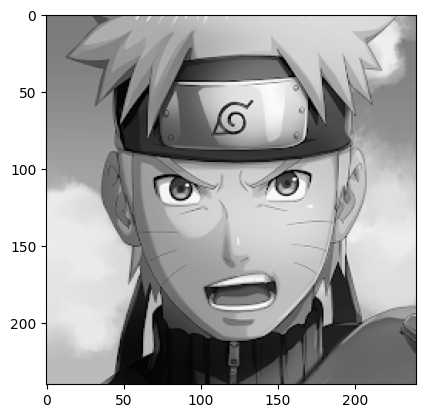

In [249]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import dct, idct

img = cv2.imread('imgs/naruto.webp', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

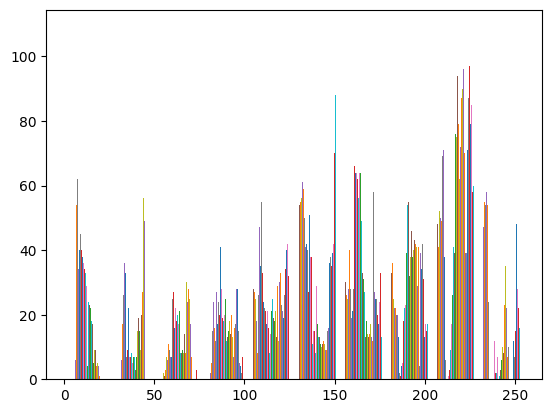

In [250]:
plt.hist(img)
plt.show()

# DCT

(array([[  0.,   2., 208., ...,   3.,   6.,  10.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   1., 239., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.]]),
 array([-554.44388234, -299.88699411,  -45.33010588,  209.22678236,
         463.78367059,  718.34055883,  972.89744706, 1227.4543353 ,
        1482.01122353, 1736.56811177, 1991.125     ]),
 <a list of 240 BarContainer objects>)

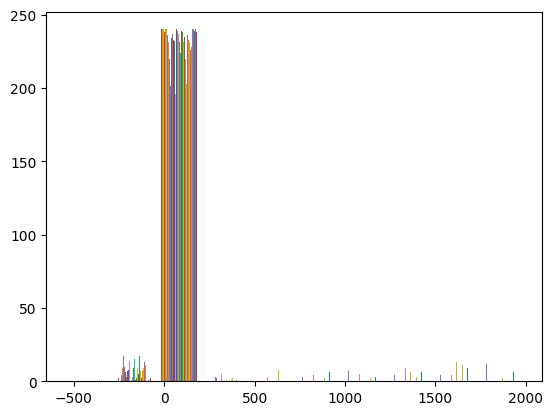

In [251]:
Y = np.zeros(img.shape)

U = img.shape[0]//8
V = img.shape[1]//8

for u in range(U):
    for v in range(V):
        img_blck = img[u*8: u*8 + 8, v*8: v*8 + 8]
        Y[u*8: u*8 + 8, v*8: v*8 + 8] = dct(dct(img_blck, axis=0, norm='ortho'), axis=1, norm='ortho')


# plt.imshow(Y, cmap='gray')
plt.hist(Y)

# Quantizando

In [252]:
quantization = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99],
])


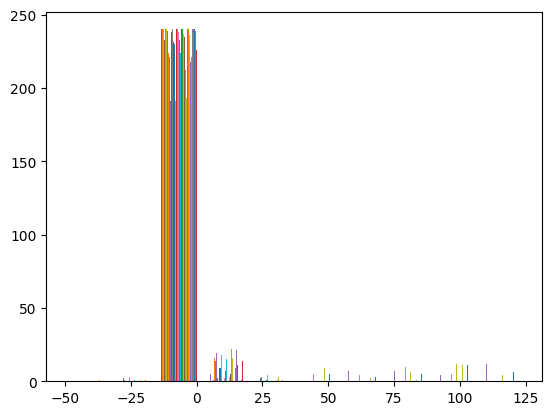

In [263]:
Y_quant = np.zeros(img.shape)

for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y[u*8 : u*8 + 8, v*8 : v*8 + 8] / quantization
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] *= np.abs(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]) >= .1


plt.hist(Y_quant)
plt.show()

In [254]:
Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8]

array([[53.7109375 , -0.15454855,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.42775678, -0.        , -0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        ],
       [-0.        ,  0.        , -0.        , -0.        ,  0.        ,
         0.        , -0.        ,  0.        ],
       [-0.        , -0.        ,  0.        , -0.        , -0.        ,
         0.        , -0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        ],
       [-0.        ,  0.        , -0.        , -0.        ,  0.        ,
        -0.        , -0.        ,  0.        ]])

In [268]:
# Qual melhor filtro para a img quantizada ???
u = v = 0
((np.abs(Y_quant) > 0.1).sum() , (np.abs(Y_quant) != 0).sum(), Y.size)



(19367, 56324, 57600)

# Desquantizando

(array([[  0.,   2., 208., ...,   3.,   6.,  10.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   1., 239., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.]]),
 array([-554.44388234, -299.88699411,  -45.33010588,  209.22678236,
         463.78367059,  718.34055883,  972.89744706, 1227.4543353 ,
        1482.01122353, 1736.56811177, 1991.125     ]),
 <a list of 240 BarContainer objects>)

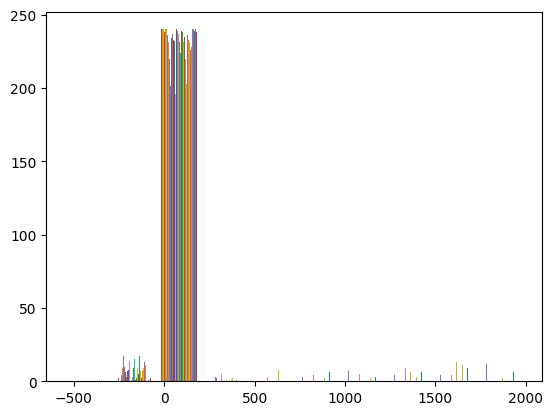

In [256]:
for u in range(U):
    for v in range(V):
        Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] = Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8] * quantization

plt.hist((Y_quant))

(array([[  0.,   2., 208., ...,   3.,   6.,  10.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 240., ...,   0.,   0.,   0.],
        [  0.,   1., 239., ...,   0.,   0.,   0.],
        [  0.,   0., 240., ...,   0.,   0.,   0.]]),
 array([-554.44388234, -299.88699411,  -45.33010588,  209.22678236,
         463.78367059,  718.34055883,  972.89744706, 1227.4543353 ,
        1482.01122353, 1736.56811177, 1991.125     ]),
 <a list of 240 BarContainer objects>)

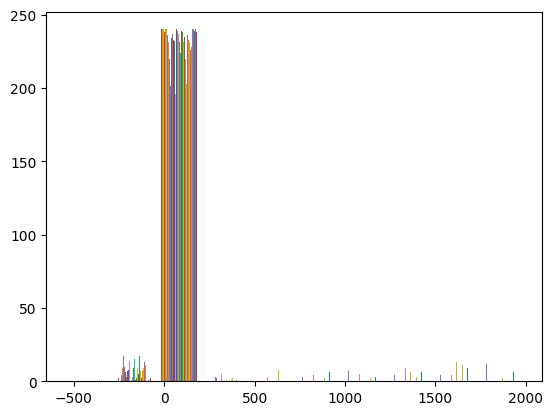

In [257]:
plt.hist(Y)

In [258]:
(np.abs(Y - Y_quant)).sum()/Y.size

0.8264559422343702

In [259]:
img_rec = np.zeros(img.shape)
for u in range(U):
    for v in range(V):
        img_rec[u*8 : u*8 + 8, v*8 : v*8 + 8] = idct(idct(Y_quant[u*8 : u*8 + 8, v*8 : v*8 + 8], axis=0, norm='ortho'), axis=1, norm='ortho')


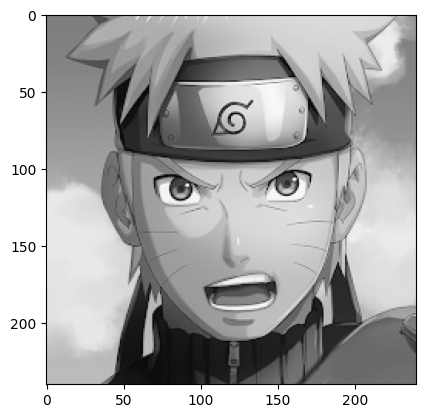

In [260]:
plt.imshow((img_rec), cmap='gray')

# Comparação de imagens


(array([[ 0.,  0.,  0., ..., 30., 53., 44.],
        [ 0.,  0.,  0., ..., 32., 51., 45.],
        [ 0.,  0.,  0., ..., 31., 51., 46.],
        ...,
        [ 0.,  2.,  7., ..., 11., 62., 17.],
        [ 0.,  1.,  9., ..., 16., 59., 16.],
        [ 0.,  0., 11., ..., 17., 60., 16.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 240 BarContainer objects>)

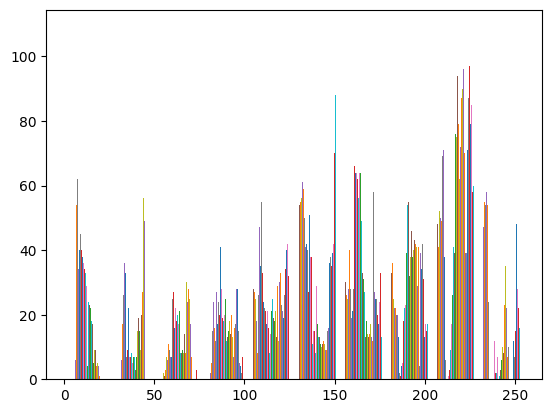

In [261]:
plt.hist(img)

(array([[ 0.,  0.,  0., ..., 32., 57., 39.],
        [ 0.,  0.,  0., ..., 33., 56., 39.],
        [ 0.,  0.,  0., ..., 32., 54., 42.],
        ...,
        [ 0.,  1.,  6., ..., 12., 66., 13.],
        [ 0.,  0.,  8., ..., 16., 62., 13.],
        [ 0.,  0., 11., ..., 19., 62., 12.]]),
 array([ -9.18169875,  17.55684515,  44.29538905,  71.03393295,
         97.77247685, 124.51102075, 151.24956465, 177.98810855,
        204.72665245, 231.46519635, 258.20374025]),
 <a list of 240 BarContainer objects>)

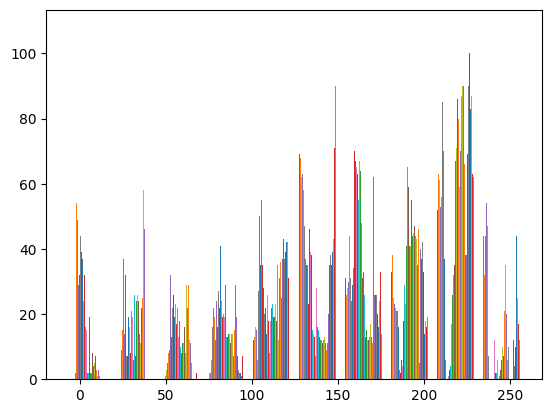

In [262]:
plt.hist(img_rec)